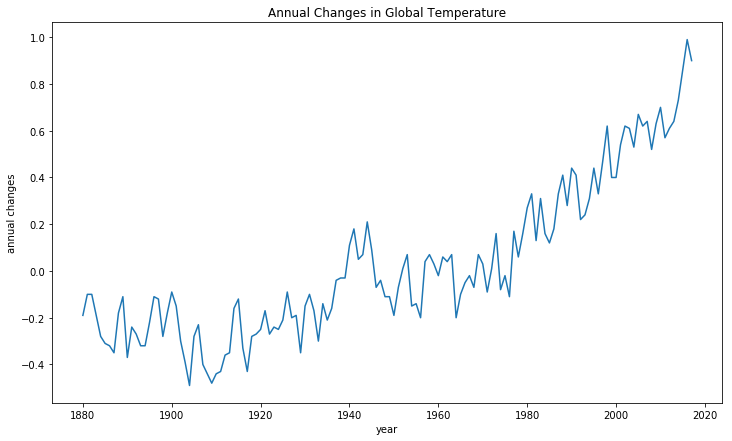

In [1]:
import numpy as np
import matplotlib.pylab as plt
import csv

data = open('data/Global_Temperature.csv','r')
dataline = csv.reader(data)
year_list = []
data_origin_list = []
for line in dataline:
    data_origin_list.append(float(line[1]))
    year_list.append(int(line[0][-4:]))
    
year = np.array(year_list)
data_origin = np.array(data_origin_list,dtype='float64')

fig_1 = plt.figure()
fig_1.set_size_inches(12,7)

plt.xlabel('year')
plt.ylabel('annual changes')
plt.title('Annual Changes in Global Temperature')
plt.plot(year,data_origin)
# plt.savefig('output/original_data.png')
plt.show()

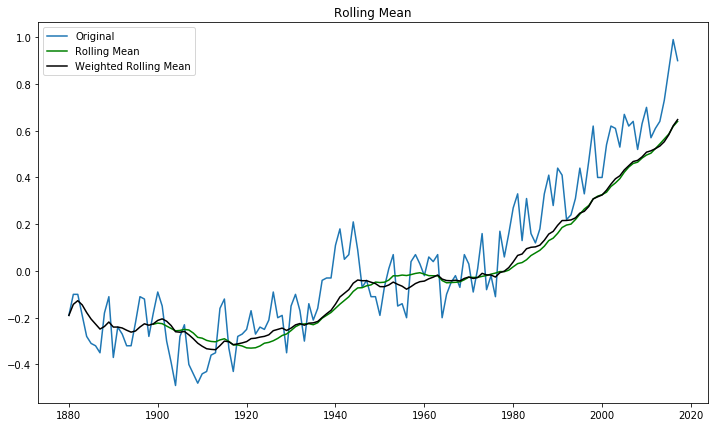

In [10]:
import pandas as pd
size= 20
data_pd = pd.DataFrame(data_origin)
# f = plt.figure(facecolor='white')
# 对size个数据进行移动平均
rol_mean = data_pd.rolling(window=size).mean()
# 对size个数据进行加权移动平均
rol_weighted_mean = data_pd.ewm(span=size).mean()

plt.rcParams['figure.figsize'] = (12, 7)
plt.plot(year,data_pd, label='Original')
plt.plot(year,rol_mean,color='green', label='Rolling Mean')
plt.plot(year,rol_weighted_mean,color='black', label='Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean')
plt.savefig('output/rolling mean.png')
plt.show()